In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] 
        dataX.append(a) 
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)


In [5]:
dataframe = pd.read_csv('train_data4.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [6]:
print(dataframe.head())


   bend_thumb
0           7
1           5
2           5
3           7
4           5


In [7]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))


820 404


In [8]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [10]:
print(trainX)

[[0.05454545]
 [0.04242424]
 [0.04242424]
 [0.05454545]
 [0.04242424]
 [0.05454545]
 [0.04242424]
 [0.05454545]
 [0.05454545]
 [0.07272727]
 [0.16969697]
 [0.27878785]
 [0.39999998]
 [0.5090909 ]
 [0.6545454 ]
 [0.7515151 ]
 [0.7515151 ]
 [0.6545454 ]
 [0.860606  ]
 [0.860606  ]
 [0.860606  ]
 [0.860606  ]
 [0.860606  ]
 [0.7515151 ]
 [0.7515151 ]
 [0.860606  ]
 [0.7515151 ]
 [0.860606  ]
 [0.6545454 ]
 [0.6545454 ]
 [0.6545454 ]
 [0.45454544]
 [0.27878785]
 [0.21818182]
 [0.14545454]
 [0.12727273]
 [0.09090909]
 [0.04242424]
 [0.03030303]
 [0.04242424]
 [0.03030303]
 [0.01212121]
 [0.01818182]
 [0.01212121]
 [0.01212121]
 [0.01212121]
 [0.01212121]
 [0.01212121]
 [0.01212121]
 [0.01212121]
 [0.        ]
 [0.10303029]
 [0.09090909]
 [0.10303029]
 [0.12727273]
 [0.12727273]
 [0.16969697]
 [0.24848485]
 [0.31515148]
 [0.39999998]
 [0.45454544]
 [0.5090909 ]
 [0.57575756]
 [0.6545454 ]
 [0.6545454 ]
 [0.7515151 ]
 [0.860606  ]
 [0.860606  ]
 [0.860606  ]
 [0.7515151 ]
 [0.860606  ]
 [0.86

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
818/818 - 5s - loss: 0.0558 - 5s/epoch - 6ms/step
Epoch 2/100
818/818 - 2s - loss: 0.0111 - 2s/epoch - 3ms/step
Epoch 3/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 4/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 5/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 6/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 7/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 8/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 9/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 10/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 11/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 12/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 13/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 14/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 3ms/step
Epoch 15/100
818/818 - 2s - loss: 0.0036 - 2s/epoch - 2ms/step
Epoch 16/100
818/818 - 2s - loss: 0.0035 - 2s/epoch - 2ms/step
E

In [13]:
y_pred = model.predict(trainX)
y_pred


26/26 [==============================] - 1s 2ms/step


array([[0.05912264],
       [0.04786582],
       [0.04786582],
       [0.05912264],
       [0.04786582],
       [0.05912264],
       [0.04786582],
       [0.05912264],
       [0.05912264],
       [0.07623845],
       [0.17147735],
       [0.28373703],
       [0.40936488],
       [0.5185168 ],
       [0.65254366],
       [0.7325969 ],
       [0.7325969 ],
       [0.65254366],
       [0.81306255],
       [0.81306255],
       [0.81306255],
       [0.81306255],
       [0.81306255],
       [0.7325969 ],
       [0.7325969 ],
       [0.81306255],
       [0.7325969 ],
       [0.81306255],
       [0.65254366],
       [0.65254366],
       [0.65254366],
       [0.46465695],
       [0.28373703],
       [0.22095545],
       [0.14712924],
       [0.1290803 ],
       [0.09361556],
       [0.04786582],
       [0.03673774],
       [0.04786582],
       [0.03673774],
       [0.02029711],
       [0.02574306],
       [0.02029711],
       [0.02029711],
       [0.02029711],
       [0.02029711],
       [0.020

In [14]:
print("Accuracy:", accuracy_score(testY, y_pred ))


ValueError: Found input variables with inconsistent numbers of samples: [402, 818]

ValueError: Data cardinality is ambiguous:
  x sizes: 408
  y sizes: 1
Make sure all arrays contain the same number of samples.

7/7 [==============================] - 0s 2ms/step
Train Score: 8.73 RMSE
Test Score: 9.54 RMSE


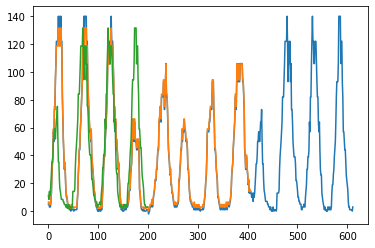

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()


In [41]:
print(trainPredict)


[[  6.555784  ]
 [  6.555784  ]
 [  4.719575  ]
 [  4.719575  ]
 [  4.719575  ]
 [  8.414501  ]
 [ 14.116264  ]
 [ 27.004868  ]
 [ 35.194347  ]
 [ 40.371223  ]
 [ 59.06694   ]
 [ 51.814625  ]
 [ 75.289055  ]
 [ 75.289055  ]
 [ 94.35113   ]
 [105.774536  ]
 [118.65752   ]
 [118.65752   ]
 [118.65752   ]
 [118.65752   ]
 [131.56827   ]
 [118.65752   ]
 [118.65752   ]
 [131.56827   ]
 [118.65752   ]
 [131.56827   ]
 [118.65752   ]
 [118.65752   ]
 [ 84.06835   ]
 [ 66.24204   ]
 [ 51.814625  ]
 [ 40.371223  ]
 [ 31.081648  ]
 [ 35.194347  ]
 [ 27.004868  ]
 [ 16.055412  ]
 [ 11.242742  ]
 [ 11.242742  ]
 [  8.414501  ]
 [  4.719575  ]
 [  4.719575  ]
 [  4.719575  ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.0093832 ]
 [  4.719575  ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.0093832 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  2.9067554 ]
 [  8.414501  ]
 [ 14.116264  ]
 [ 27.004868  ]
 [ 35.194347  ]
 [ 45.57